[Источник вдохновения](https://iopscience.iop.org/article/10.1088/1742-6596/1028/1/012119/pdf)

In [1]:
!gdown 1A_7QMxQMypTp_ZaioOiBhrglQjPUxyz4
!unzip persons_pics.zip

Downloading...
From: https://drive.google.com/uc?id=1A_7QMxQMypTp_ZaioOiBhrglQjPUxyz4
To: /content/persons_pics.zip
100% 9.64M/9.64M [00:00<00:00, 39.0MB/s]
Archive:  persons_pics.zip
  inflating: persons_pics.csv        
  inflating: __MACOSX/._persons_pics.csv  


In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('persons_pics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,label
0,0.315033,0.333333,0.397386,0.467974,0.402614,0.337255,0.420915,0.495425,0.473203,0.498039,...,0.447059,0.458824,0.432680,0.400000,0.362092,0.373856,0.525490,0.606536,0.465359,Tony Blair
1,0.117647,0.223529,0.317647,0.334641,0.362092,0.386928,0.368627,0.351634,0.354248,0.341176,...,0.230065,0.203922,0.235294,0.283660,0.271895,0.247059,0.303268,0.407843,0.520261,Gerhard Schroeder
2,0.363399,0.253595,0.197386,0.249673,0.258824,0.274510,0.305882,0.311111,0.296732,0.292810,...,0.664052,0.669281,0.687582,0.690196,0.707190,0.732026,0.518954,0.179085,0.312418,Donald Rumsfeld
3,0.551634,0.564706,0.518954,0.401307,0.343791,0.390850,0.379085,0.405229,0.483660,0.475817,...,0.383007,0.396078,0.411765,0.427451,0.449673,0.461438,0.439216,0.416993,0.454902,George W Bush
4,0.354248,0.356863,0.415686,0.322876,0.354248,0.528105,0.618301,0.648366,0.670588,0.700654,...,0.337255,0.366013,0.469281,0.656209,0.810458,0.882353,0.913726,0.939869,0.942484,George W Bush


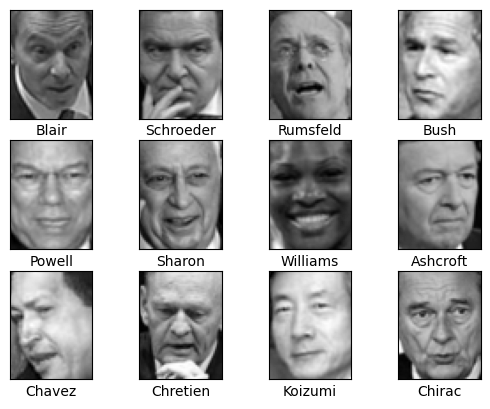

In [18]:
# Список уникальных лиц
labels = df.label.unique()
# Первая встреча каждого лица в датасете
examples = [df[df.label==labels[i]].iloc[0].drop('label') for i in range(len(labels))]

import matplotlib.pyplot as plt

# Отобразить выбранные лица
def get_img_by_row(pic,idx):
  return pic.astype(float).to_numpy().reshape(62,47), labels[idx]
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(examples[i], i)
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])


Бейслайн

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'],axis=1), df['label'], test_size=0.2, random_state=42, stratify=df['label'])

lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=10000).fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.7986484731959846

In [93]:
lr.coef_.shape

(12, 2914)

In [94]:
lr.classes_

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype=object)

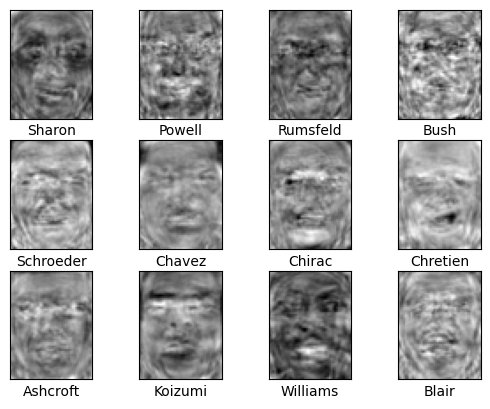

In [95]:
# Отобразить выбранные лица
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    img, lbl = lr.coef_[i].reshape(62,47), lr.classes_[i]
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])

PCA

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.n_components_

94

PCA + классификация (логрег)

In [97]:
lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=10000).fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
f1_score(y_test, y_pred, average='weighted')

0.7619495885078724

In [98]:
lr.coef_.shape

(12, 94)

Попробуем визуализировать коэффициенты логистической регрессии в этом случае.

In [99]:
print('Изначальное соотношение сторон: ', np.round(62/47,2))

Изначальное соотношение сторон:  1.32


In [101]:
# 62*47 = 2914
# 1.32*w*w = 93
w = (94/1.32)**0.5
h = 1.32*x
print('Высота, ширина: ', h,w)

Высота, ширина:  11.079711187571633 8.43872746402686


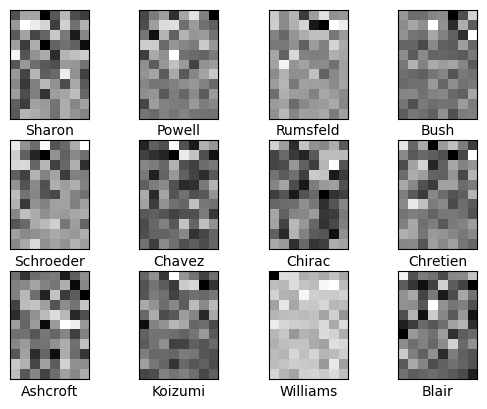

In [102]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    img, lbl = lr.coef_[i][:-6].reshape(11, -1), lr.classes_[i]
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])

PCA + LDA классификация

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train_pca, y_train)
y_pred = lda.predict(X_test_pca)
f1_score(y_test, y_pred, average='weighted')


0.8165247986232473

In [104]:
lda.coef_.shape

(12, 94)

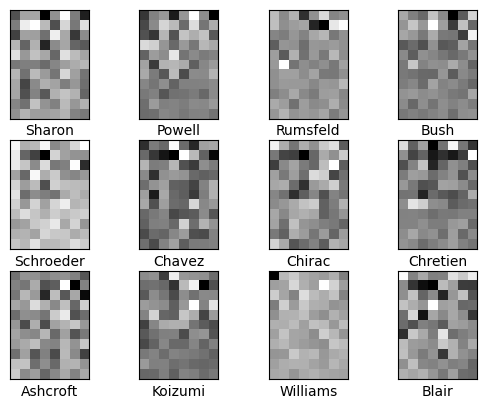

In [105]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    img, lbl = lda.coef_[i][:-6].reshape(11, -1), lda.classes_[i]
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])

<Axes: >

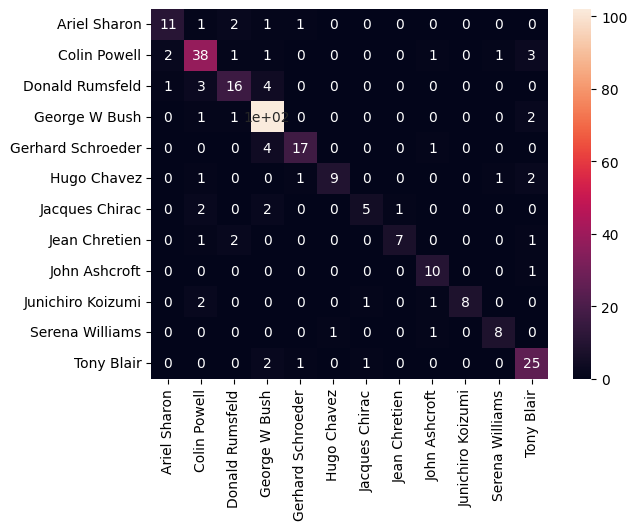

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=lda.classes_, index=lda.classes_)
sns.heatmap(cm, annot=True)

PCA + LDA + классификация (логрег)

In [107]:
lda = LinearDiscriminantAnalysis(n_components=None)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)

lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=10000).fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)
f1_score(y_test, y_pred, average='weighted')

0.8078333462696392

KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier

# Исходные изображения
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.46953122987262347

In [109]:
# PCA
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)
f1_score(y_test, y_pred, average='weighted')

0.62171152474151

In [110]:
# PCA + LDA
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_lda, y_train)
y_pred = neigh.predict(X_test_lda)
f1_score(y_test, y_pred, average='weighted')

0.7872295534555163